In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

from detect import get_detections

detections = get_detections()
image_path = detections["image"]
objects = detections["detections"]


/Users/garrettcox/Desktop/engr407-drone/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/garrettcox/Desktop/engr407-drone/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


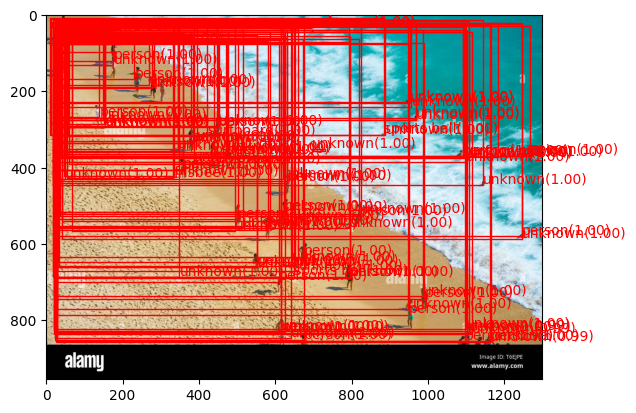

In [2]:
fig, ax = plt.subplots(1)
image = plt.imread(image_path)

ax.imshow(image)

image_height, image_width = image.shape[:2]

for o in objects:
    box = o["box"]
    xmin = int(box[0] * image_width)
    ymin = int(box[1] * image_height)
    xmax = int(box[2] * image_width)
    ymax = int(box[3] * image_height)

    rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=1, edgecolor="r", facecolor="none")
    ax.add_patch(rect)

    score = o["confidence"]
    class_label = o["class"] + f"({score:.2f})"
    ax.text(xmin, ymin - 5, class_label, fontsize=10, color="r")


plt.show()